<a href="https://colab.research.google.com/github/tohver/Deep-Learning/blob/master/DaliMOnetRenoir_classifier_widgetEdition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [30]:
cd gdrive/My\ Drive/Colab\ Notebooks/artists

In [5]:
model = load_learner('export.pkl')

In [31]:
model.dls.vocab

In [32]:
btn_upload = widgets.FileUpload()

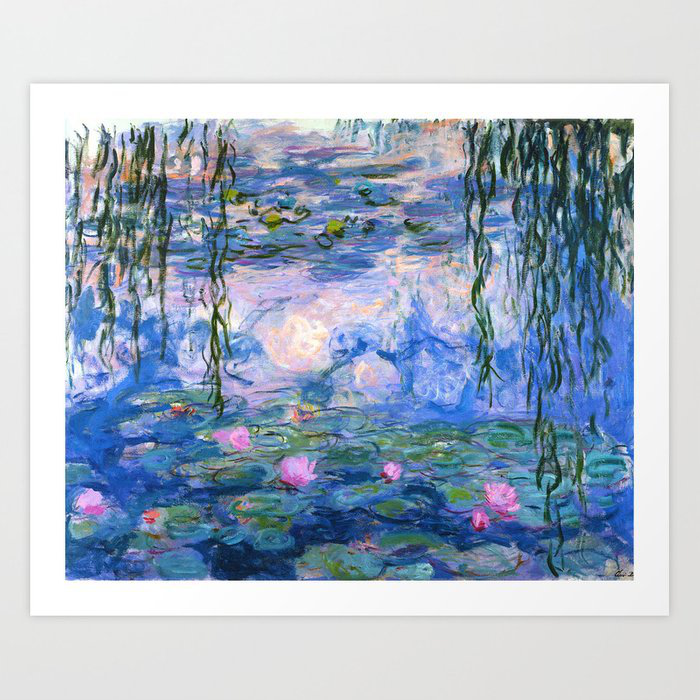

In [15]:
img = PILImage.create(btn_upload.data[-1])
img

In [16]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [17]:
pred, pred_idx, probs = model.predict(img)

In [21]:
lbl_pred = widgets.Label()
lbl_pred.value = f'There probability that this is a painting of {pred.capitalize()} is: {probs[pred_idx]:.4f}'
lbl_pred

Label(value='There probability that this is a painting of Monet is: 1.0000')

In [33]:
btn_run = widgets.Button(description = 'Classify')

In [27]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = model.predict(img)
    lbl_pred.value = f'The probability that this is a picture of {pred.capitalize()} is: {probs[pred_idx]*100:.2f}%'
btn_run.on_click(on_click_classify)

In [28]:
VBox(
    [widgets.Label('Select the image'), 
      btn_upload, btn_run, out_pl, lbl_pred]
     )